This notebook is to generate the plots for simple simulatons:
1. sim1_sig, sim1_fdr and sim1_pval for first scenario;
2. sim2_sig, sim2_fdr and sim2_pval for second scenario.

## Plots for simple simulation

In [12]:
import numpy as np
import scipy as sp
import scipy.stats
from statsmodels.distributions.empirical_distribution import ECDF
from numpy import linalg as LA
import pickle

%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
import pylab

## simulation 1 (Figure 2a, 2b)

In [13]:
with open("../results/simulation1_v6.pkl", "rb") as f:
    ss1, otu_bh1, otu_fbh1, otu_ds1, FDR_bh1, FDR_fbh1, FDR_ds1, pval_bh1, pval_fbh1, pval_ds1, PWR_bh1, PWR_fbh1, PWR_ds1 = pickle.load(f)

<IPython.core.display.Javascript object>


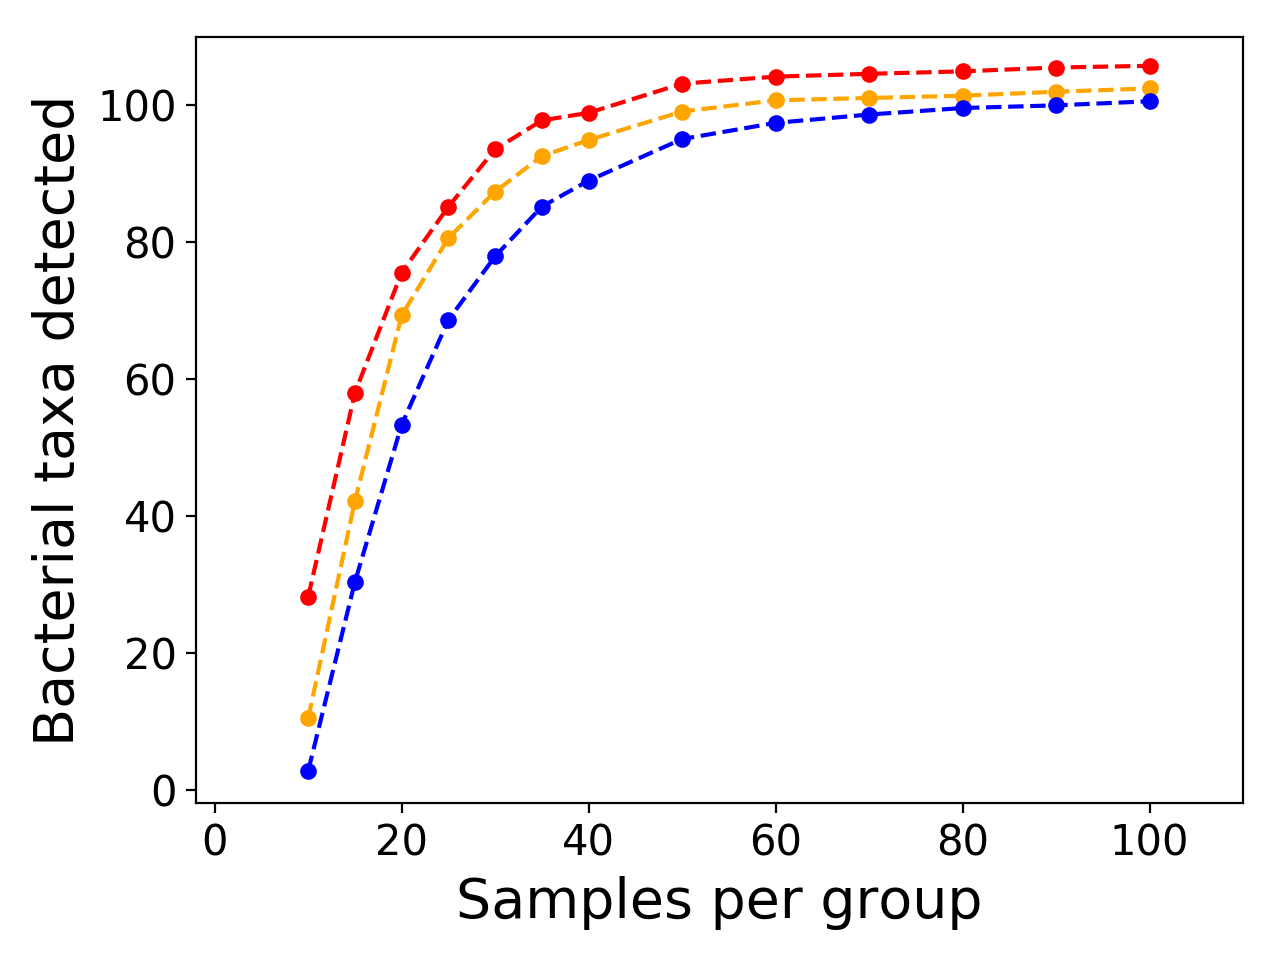

In [14]:
sim1_sig = plt.figure()
plt.plot(ss1, otu_ds1, linestyle='--', marker='o', color = 'red', markeredgewidth=0.0, label = 'DS')
plt.plot(ss1, otu_fbh1, linestyle='--', marker='o', color = 'orange', markeredgewidth=0.0, label = 'FBH')
plt.plot(ss1, otu_bh1, linestyle='--', marker='o', color = 'blue', markeredgewidth=0.0, label = 'BH')
plt.xlabel('Samples per group', fontsize = 20)
plt.ylabel('Bacterial taxa detected', fontsize = 20)
plt.xticks(np.arange(0,130,20))
plt.xlim([-2, 110])
plt.ylim([-2, 110])
plt.tick_params(labelsize=15)
plt.tight_layout()
sim1_sig.savefig('../plots/simulation1_sig.png')

<IPython.core.display.Javascript object>


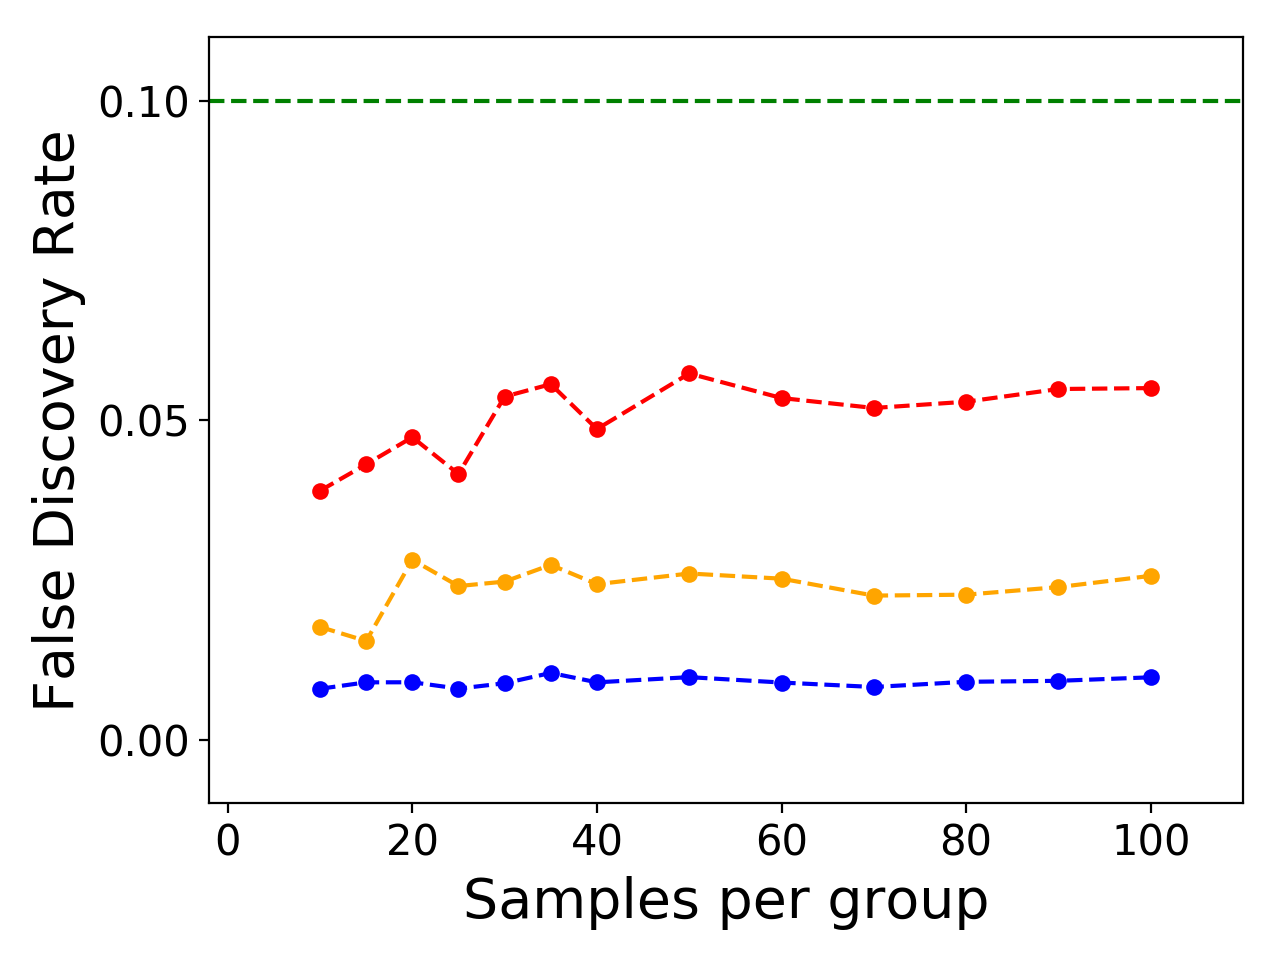

In [4]:
sim1_fdr = plt.figure()
plt.axhline(0.1, linestyle='--', color = 'green', markeredgewidth=0.0, label = 'nominal level')
plt.plot(ss1, FDR_ds1, linestyle='--', marker='o', color = 'red', markeredgewidth=0.0, label = 'DS')
plt.plot(ss1, FDR_fbh1, linestyle='--', marker='o', color = 'orange', markeredgewidth=0.0, label = 'FBH')
plt.plot(ss1, FDR_bh1, linestyle='--', marker='o', color = 'blue', markeredgewidth=0.0, label = 'BH')
plt.xlabel('Samples per group', fontsize = 20)
plt.ylabel('False Discovery Rate', fontsize = 20)
plt.xticks(np.arange(0,120,20))
plt.yticks(np.arange(0,0.11, 0.05))
plt.xlim([-2, 110])
plt.ylim([-0.01, 0.11])
plt.tick_params(labelsize=15)
plt.tight_layout()
sim1_fdr.savefig('../plots/simulation1_fdr.png')

#### supplementary figure

In [54]:
sample1 = pval_ds1[88]  # pvals for smaple size = 10
ecdf1 = ECDF(sample1)
x1 = np.sort(sample1)
y1 = ecdf1(x1)

sample2 = pval_ds1[178]  # pvals for smaple size = 15
ecdf2 = ECDF(sample2)
x2 = np.sort(sample2)
y2 = ecdf2(x2)

sample3 = pval_ds1[290]  # pvals for smaple size = 20
ecdf3 = ECDF(sample3)
x3 = np.sort(sample3)
y3 = ecdf3(x3)

sample4 = pval_ds1[770]  # pvals for smaple size = 50
ecdf4 = ECDF(sample4)
x4 = np.sort(sample4)
y4 = ecdf4(x4)

<IPython.core.display.Javascript object>


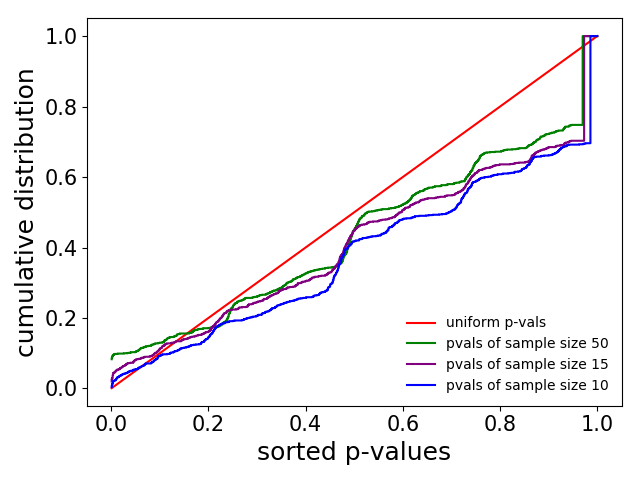

In [55]:
sim1_pval = plt.figure()
plt.plot(x1, x1, color = 'red', markeredgewidth=0.0, label = 'uniform p-vals')

plt.step(x4, y4, color = 'green', markeredgewidth=0.0, label = 'pvals of sample size 50')
plt.step(x2, y2, color = 'purple', markeredgewidth=0.0, label = 'pvals of sample size 15')
plt.step(x1, y1, color = 'blue', markeredgewidth=0.0, label = 'pvals of sample size 10')

pylab.legend(loc ='lower right', frameon=False)
plt.xlabel('sorted p-values', fontsize = 18)
plt.ylabel('cumulative distribution', fontsize = 18)
plt.tick_params(labelsize=15)
plt.tight_layout()
sim1_pval.savefig('../plots/simulation1_pval.pdf')

## simulation 2 (Figure 2c, 2d)

In [5]:
with open("../results/simulation2_v6.pkl", "rb") as f:
    d, otu_bh2, otu_fbh2, otu_ds2, FDR_bh2, FDR_fbh2, FDR_ds2, pval_bh2, pval_fbh2, pval_ds2,PWR_bh2, PWR_fbh2, PWR_ds2 = pickle.load(f) 

<IPython.core.display.Javascript object>


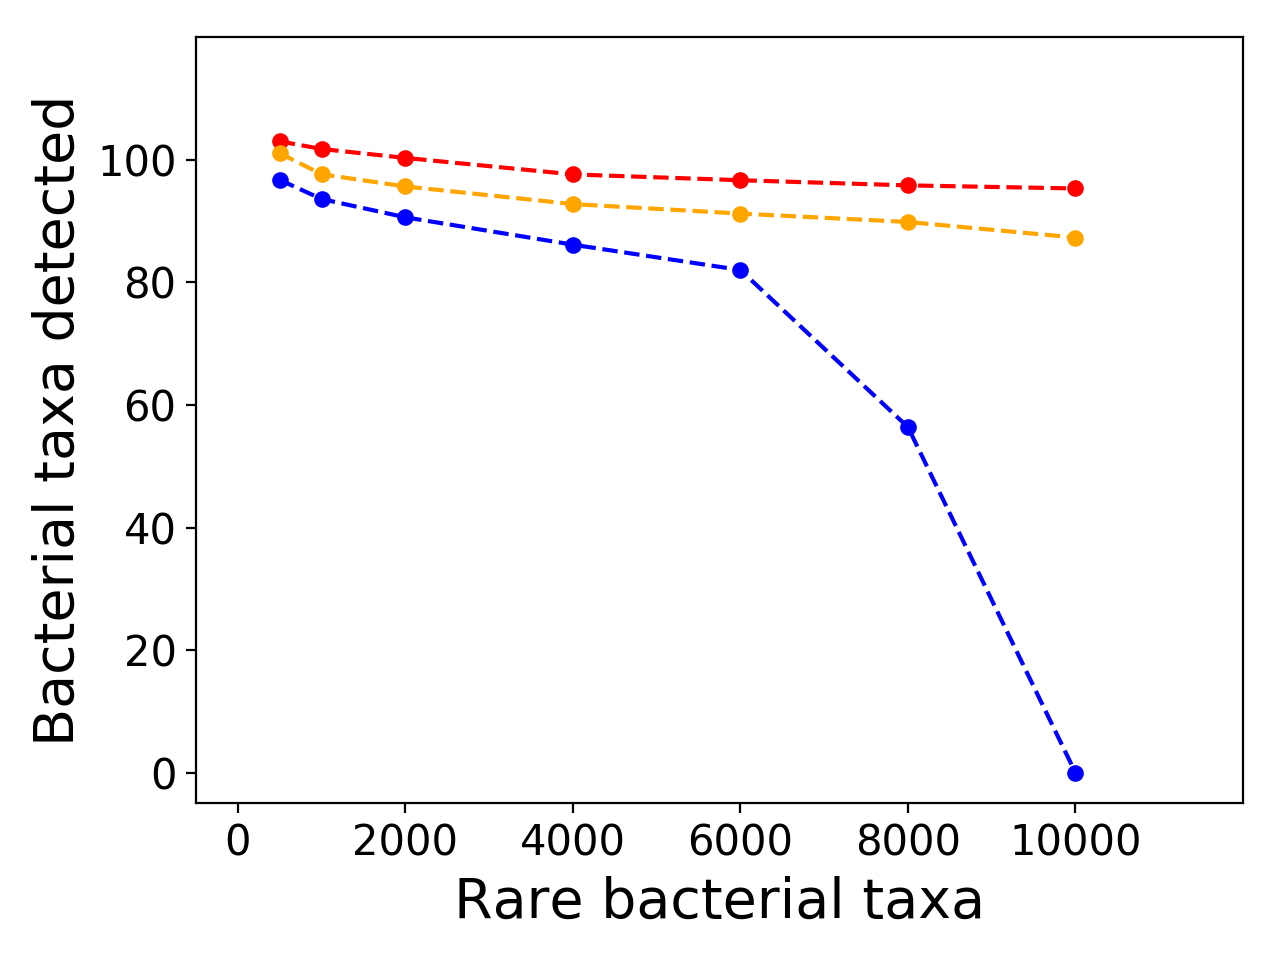

In [6]:
sim2_sig = plt.figure()
plt.plot(d, otu_ds2, linestyle='--', marker='o', markeredgewidth=0.0, color = 'red', label = 'DS')
plt.plot(d, otu_fbh2, linestyle='--', marker='o', markeredgewidth=0.0, color = 'orange', label = 'FBH')
plt.plot(d, otu_bh2, linestyle='--', marker='o', markeredgewidth=0.0, color = 'blue', label = 'BH')

plt.xlabel('Rare bacterial taxa', fontsize = 20)
plt.ylabel('Bacterial taxa detected', fontsize = 20)
plt.xticks(np.arange(0, 11000, 2000))
plt.yticks(np.arange(0, 120, 20))
plt.xlim([-500, 12000])
plt.ylim([-5, 120])
plt.tick_params(labelsize=15)
plt.tight_layout()
sim2_sig.savefig('../plots/simulation2_sig.png')

<IPython.core.display.Javascript object>


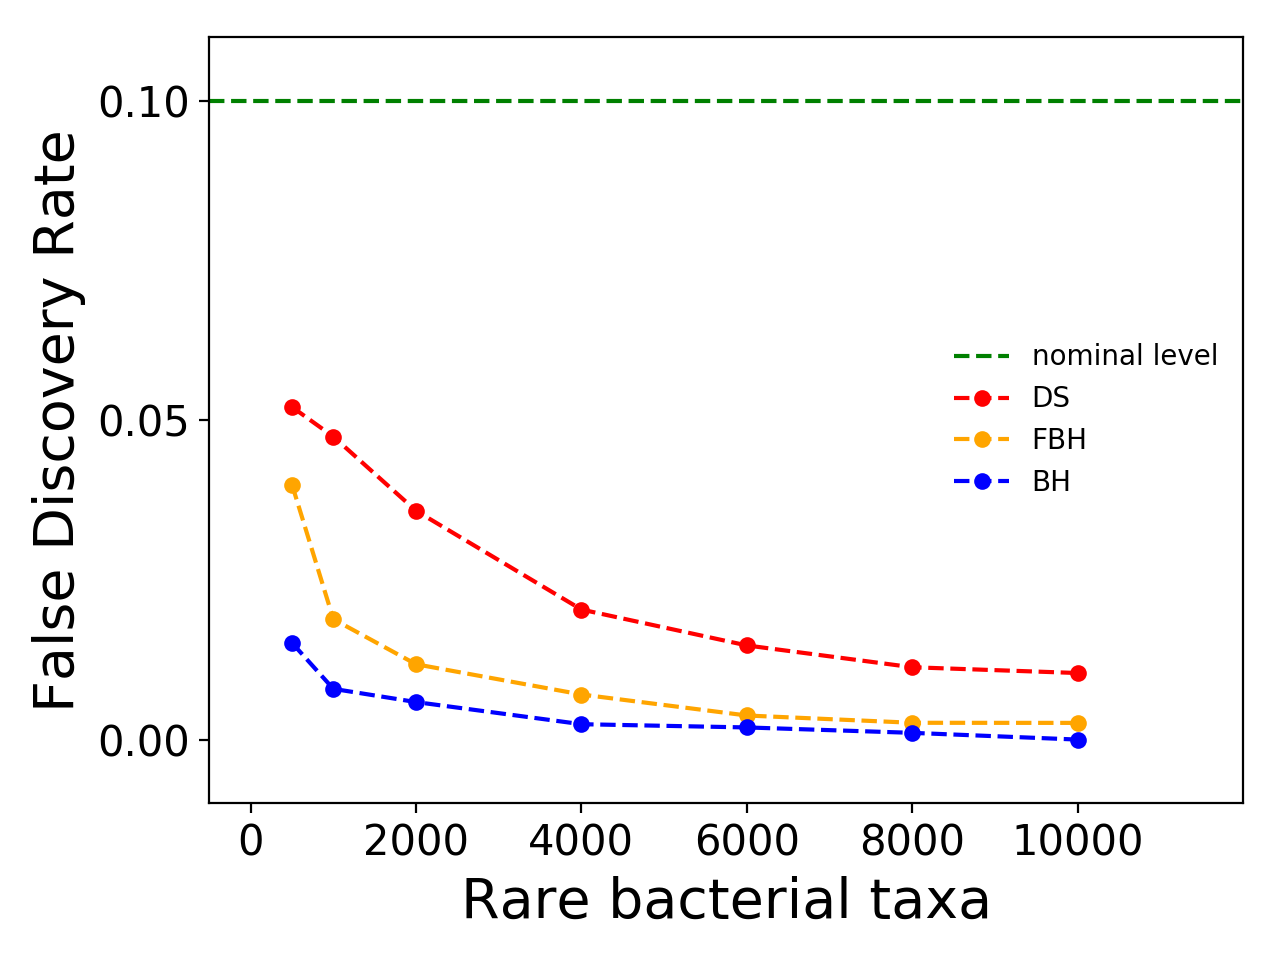

In [7]:
# when no rejection, FDR is zero
FDR_bh2[6] = 0

sim2_fdr = plt.figure()
plt.axhline(0.1, linestyle='--', color = 'green', label = 'nominal level')
plt.plot(d, FDR_ds2, linestyle='--', marker='o', markeredgewidth=0.0, color = 'red', label = 'DS')
plt.plot(d, FDR_fbh2, linestyle='--', marker='o', markeredgewidth=0.0, color = 'orange', label = 'FBH')
plt.plot(d, FDR_bh2, linestyle='--', marker='o', markeredgewidth=0.0, color = 'blue', label = 'BH')

pylab.legend(loc ='center right', frameon=False)
plt.xlabel('Rare bacterial taxa', fontsize = 20)
plt.ylabel('False Discovery Rate', fontsize = 20)
plt.xticks(np.arange(0, 12000, 2000))
plt.yticks(np.arange(0,0.11, 0.05))
plt.xlim([-500, 12000])
pylab.ylim([-0.01, 0.11])
plt.tick_params(labelsize=15)
plt.tight_layout()
sim2_fdr.savefig('../plots/simulation2_fdr.png')

#### supplentary figure

In [58]:
sample1 = pval_ds2[98]  # pvals for d=500
ecdf1 = ECDF(sample1)
x1 = np.sort(sample1)
y1 = ecdf1(x1)

sample2 = pval_ds2[290]  # pvals for d=2k
ecdf2 = ECDF(sample2)
x2 = np.sort(sample2)
y2 = ecdf2(x2)

sample3 = pval_ds2[478]  # pvals for d=6k
ecdf3 = ECDF(sample3)
x3 = np.sort(sample3)
y3 = ecdf3(x3)

sample4 = pval_ds2[598]  # pvals for d=8k
ecdf4 = ECDF(sample4)
x4 = np.sort(sample4)
y4 = ecdf4(x4)

sample5 = pval_ds2[690]  # pvals for d=10k
ecdf5 = ECDF(sample5)
x5 = np.sort(sample5)
y5 = ecdf5(x5)

<IPython.core.display.Javascript object>


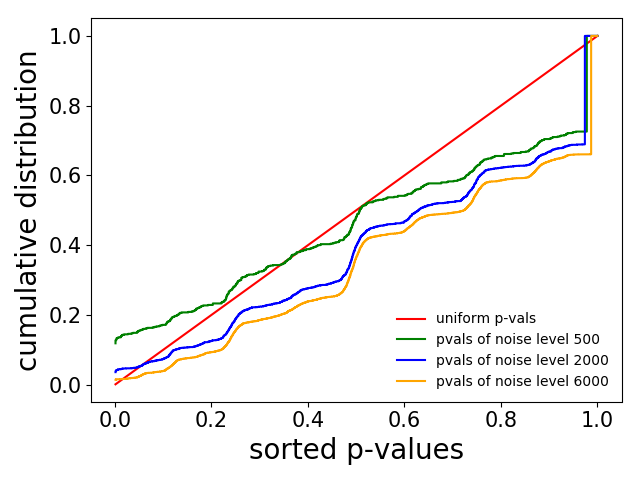

In [59]:
sim2_pval = plt.figure()
plt.plot(x1, x1, color = 'red', label = 'uniform p-vals')
plt.step(x1, y1, color = 'green', label = 'pvals of noise level 500')
plt.step(x2, y2, color = 'blue', label = 'pvals of noise level 2000')
plt.step(x3, y3, color = 'orange', label = 'pvals of noise level 6000')
pylab.legend(loc ='lower right', frameon=False)
plt.xlabel('sorted p-values', fontsize = 20)
plt.ylabel('cumulative distribution', fontsize = 20)
plt.tick_params(labelsize=15)
plt.tight_layout()
sim2_pval.savefig('../plots/simulation2_pval.pdf')